PART 1: CLUSTERING WITH DISTANCE METRICS
------------------------------------------------

1.       Euclidean distance
2.       Manhattan distance
3.       Maximum norm
4.       Mahalanobis distance
5.       Inner product space
6.       Hamming distance

--
Using K-Means or DBSCAN

In [5]:
data_path = '/home/aaliya/Downloads/MallCustomers (1).csv'

In [10]:
#Libraries
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from scipy.spatial.distance import cdist, pdist, squareform
from sklearn.preprocessing import StandardScaler

In [11]:
# Load the dataset
df = pd.read_csv(data_path)
print(df.describe())

       customer_id         age  annual_income  spending_score
count   200.000000  200.000000     200.000000      200.000000
mean    100.500000   38.850000      60.560000       50.200000
std      57.879185   13.969007      26.264721       25.823522
min       1.000000   18.000000      15.000000        1.000000
25%      50.750000   28.750000      41.500000       34.750000
50%     100.500000   36.000000      61.500000       50.000000
75%     150.250000   49.000000      78.000000       73.000000
max     200.000000   70.000000     137.000000       99.000000


In [12]:
#Therefore, annual income and spending score can be x

In [13]:
X = df[['annual_income', 'spending_score']].values

Euclidean distance
----------------------

In [51]:
#K-MEANS
#Since K-means relies more on centroid based clustering, it performs well with euclieadian distance metric
#minimizes sum of squared distances

labels_euclidean = KMeans(n_clusters=3, random_state=42).fit(X).labels_
print("Clustering with Euclidean distance:")
print(labels_euclidean)
print()

Clustering with Euclidean distance:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]



/home/aaliya/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


n_init included later to be 10 (not error)

Manhattan distance
------

In [52]:
#DBSCAN
#k-means did not natively support manhattan
labels_manhattan = DBSCAN(eps=8.0, min_samples=4, metric='manhattan').fit_predict(X)#with eps and min_samples tuned cause no clusters found initially
print("DBSCAN Clustering with Manhattan distance:")
print(labels_manhattan)

DBSCAN Clustering with Manhattan distance:
[-1  0  1  0 -1  0  1 -1  1  0 -1 -1 -1  0 -1  0  2  0  2 -1  2  0  1  0
 -1 -1  2 -1  2 -1  1  0 -1 -1 -1 -1 -1  0  3 -1  3 -1  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  4  5  4  5  4  6  4  6  4  5  4  6  4  6  4  6  4  6  4  5  4
  6  4  5  4  6  4  6  4  6  4  6  4  6  4  6  4  5  4  6  4  6  4  6  4
  6 -1  6 -1  6  4  6  4  6 -1  6  4 -1  4  6  4 -1 -1 -1 -1 -1  4 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


Maximum norm/Chebyshev
--

In [53]:
#dbscan
labels_maximum = DBSCAN(eps=7.9, min_samples=4, metric='chebyshev').fit_predict(X)
print("DBSCAN Clustering with Maximum (Chebyshev) distance:")
print(labels_maximum)

DBSCAN Clustering with Maximum (Chebyshev) distance:
[ 2  0  1  0  2  0  1 -1  1  0  1 -1  1  0  1  0  2  0  2 -1  2  0  1  0
 -1  0  2  0  2  0  1  0 -1  0 -1  0 -1  0 -1  0  3 -1  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  4  3  4  3  4  5  4  5  4  3  4  5  4  5  4  5  4  5  4  3  4
  5  4  3  4  5  4  5  4  5  4  5  4  5  4  5  4  3  4  5  4  5  4  5  4
  5  4  5  4  5  4  5  4  5  4  5  4 -1  4  5  4 -1  4  6 -1  6  4  6 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


Mahalanobis distance
----

In [54]:
#K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
labels_mahalanobis = KMeans(n_init=10,n_clusters=3, random_state=42).fit(X_scaled).labels_
print("Clustering with Mahalanobis distance:")
print(labels_mahalanobis)

Clustering with Mahalanobis distance:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]



Inner product space
----

In [55]:
#K-means
labels_inner_product = KMeans(n_init=10,n_clusters=3, random_state=42).fit(1 - np.dot(X, X.T) / (np.linalg.norm(X, axis=1)[:, None] * np.linalg.norm(X, axis=1))).labels_
print("Clustering with Inner product space:")
print(labels_inner_product)
print()

Clustering with Inner product space:
[2 2 1 2 2 2 1 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 1 2 1 2 1 2 0
 2 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0
 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]



Hamming distance
--

In [76]:
labels_hamming = DBSCAN(eps=3.5, min_samples=2, metric='hamming').fit(X).labels_
print("Clustering with Hamming distance:")
print(labels_hamming)
print("\n\n\n")

Clustering with Hamming distance:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]






Therefore, we can see that
KMeans : Euclidean and Mahalanobis distances are effective, inner-product less effective. 
DBSCAN : Manhattan and Chebyshev distances performed well for cluster formation

------------

Part 2 : Hierarchial Clustering approaches
----

In [71]:
#import more
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

K-mode
--

In [73]:
labels_k_mode = KMeans(n_init=10, n_clusters=3, random_state=42).fit(X).labels_
print("Hierarchical Clustering with K-mode:")
print(labels_k_mode)

Hierarchical Clustering with K-mode:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


K-Means
--

In [75]:
labels_k_means_plus_plus = KMeans(n_init=10, n_clusters=3, init='k-means++', random_state=42).fit(X).labels_
print("Hierarchical Clustering with K-means++:")
print(labels_k_means_plus_plus)

Hierarchical Clustering with K-means++:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


Diana
---
--

In [82]:
#Diana not supported by sklearn

In [83]:
#rpy2 can be used
#cannot be supported for my computer

In [ ]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
import pandas as pd

# Activate pandas2ri for converting DataFrame formats between Python and R
pandas2ri.activate()

# Assuming X is your dataset in numpy array or pandas DataFrame format
df = pd.DataFrame(X)  # Convert to DataFrame if needed

# Load the R cluster library and perform DIANA clustering
robjects.r('''
    library(cluster)
    diana_clustering <- function(data) {
        # Perform DIANA clustering
        diana_result <- diana(data)
        # Cut the tree to get 3 clusters
        clusters <- cutree(as.hclust(diana_result), k = 3)
        return(clusters)
    }
''')

# Call the R function from Python
diana_clustering = robjects.globalenv['diana_clustering']
labels_diana = diana_clustering(df)

# Convert R output back to a Python list
labels_diana = list(labels_diana)
print("DIANA Hierarchical Clustering Results:")
print(labels_diana)

Agnes
--

In [85]:
Z = linkage(X, method='average')
labels_agnes = fcluster(Z, 3, criterion='maxclust')
print("Hierarchical Clustering with AGNES:")
print(labels_agnes)

Hierarchical Clustering with AGNES:
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


DBSCAN
--

In [90]:
labels_dbscan = DBSCAN(eps=7.5, min_samples=4).fit(X).labels_#not fullt optimised eps and min_samples but changed value
#for maximum clustering
print("Hierarchical Clustering with DBSCAN:")
print(labels_dbscan)

Hierarchical Clustering with DBSCAN:
[ 2  0  1  0  2  0  1 -1  1  0  1 -1  1  0  1  0  2  0  2 -1  2  0  1  0
 -1  0  2 -1  2  0  1  0 -1  0 -1  0 -1  0 -1  0  3 -1  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  4  3  4  3  4  5  4  5  4  3  4  5  4  5  4  5  4  5  4  3  4
  5  4  3  4  5  4  5  4  5  4  5  4  5  4  5  4  3  4  5  4  6  4  6  4
  6  4  6  4  6  4  6  4  6  4  6  4 -1  4  6  4 -1 -1  7 -1  7  4  7 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


EVALUATAION OF RESULTS
---
--

In [91]:
from sklearn.metrics import silhouette_score

Elbow method

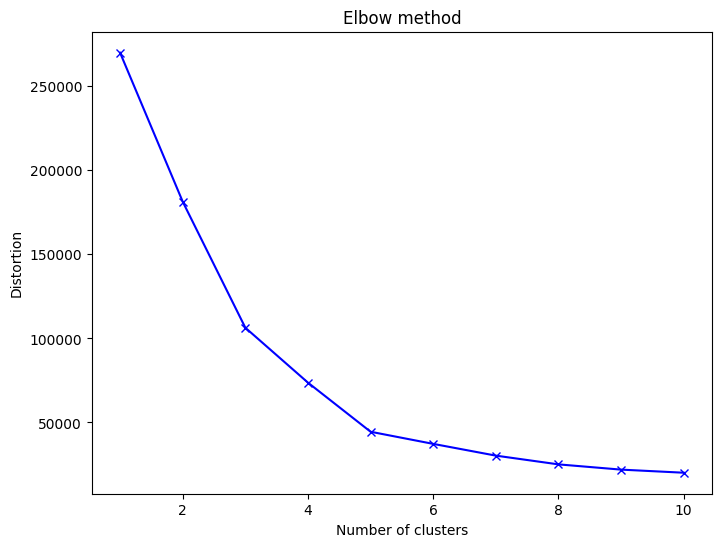

In [96]:
#Elbow
distortions = []
for i in range(1, 11):
    km = KMeans(n_init=10, n_clusters=i, random_state=42)
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow method')
plt.show()

Elbow point seems to be near k=4 or 5

Beyond the point,adding more clusters reduces distortion less significantly.

Silhouette score
--

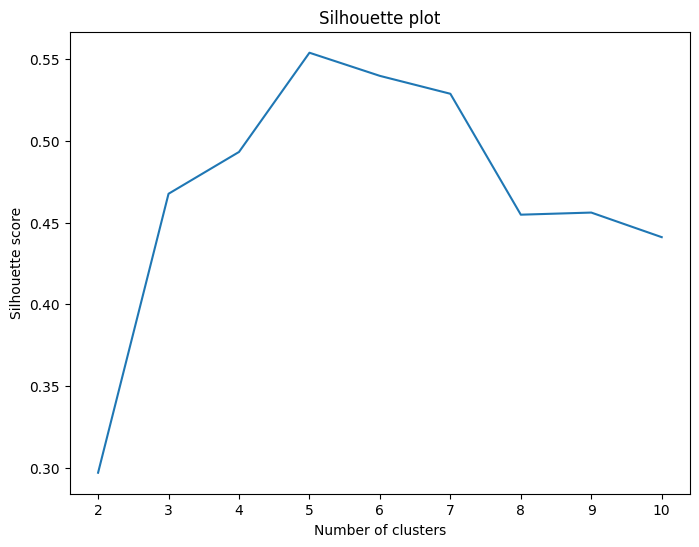

In [101]:
#silhouette
silhouette_scores = []
for n_clusters in range(2, 11):
    clusterer = KMeans(n_init=10,n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette plot')
plt.show()

Peaks at 4 or 5 clusters, 5 being the more optimal one, so near there is the optimal value of clusters

After that just decreses, meaning that adding more clusters then doesnt improve the quality

---
